# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [110]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

#Importing the Seaborn graphing toolkit package
import seaborn as sns

Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [53]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = len(newsgroups_test.target)
test_data, test_labels = newsgroups_test.data[int(num_test/2):], newsgroups_test.target[int(num_test/2):]
dev_data, dev_labels = newsgroups_test.data[:int(num_test/2)], newsgroups_test.target[:int(num_test/2)]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print ('training label shape:', train_labels.shape)
print ('test label shape:', test_labels.shape)
print ('dev label shape:', dev_labels.shape)
print ('labels names:', newsgroups_train.target_names)

training label shape: (2034,)
test label shape: (677,)
dev label shape: (676,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


(1) For each of the first 5 training examples, print the text of the message along with the label.

[2 pts]

In [54]:
def P1(num_examples=5):
### STUDENT START ###
    for ii in range(num_examples):
        print('The training label ', ii, 'is ', train_labels[ii] )
        print('The training data ', ii, 'is ', train_data[ii])
### STUDENT END ###
P1(5)

The training label  0 is  1
The training data  0 is  Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych
The training label  1 is  3
The training data  1 is  

Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demon

(2) Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

[6 pts]

In [55]:
def P2():
### STUDENT START ###

    YY = (CountVectorizer())
    YYY = YY.fit_transform(train_data)
    
    
    TT = np.empty(shape=[len(train_data)])
    for ii in range(len(train_data)):
        TT[ii] = YYY[ii].nnz

    size_vocabulary = sum(TT)
    print("The size of the Vocabulary is-", size_vocabulary)
    
    
    average_non_zero_per_example = size_vocabulary/len(train_data)
    print("The average non-zero per sample-",average_non_zero_per_example)
    
    
    fraction_non_zero = YYY.nnz/(2034*26879)
    print("The fraction of non-zero samples-",fraction_non_zero)
    
    
    print('The last feature string is:', YY.get_feature_names()[len(YY.get_feature_names())-1])
    
    
    
    print('The first feature string is:', YY.get_feature_names()[0])
    
    
    YYX = (CountVectorizer(train_data, vocabulary = ["atheism", "graphics", "space", "religion"]))
    YYYX = YYX.fit_transform(train_data)
    
    
    TTT = np.empty(shape=[len(train_data)])
    for ii in range(len(train_data)):
        TTT[ii] = YYYX[ii].nnz
    
    size_vocabulary2 = sum(TTT)
    average_non_zero_per_example2 = size_vocabulary2/len(train_data)
    print("The shape of the data for confirmation is:", YYYX.shape)
    print("The average number of non-zero samples after specifying 4-vocabulary words are-", average_non_zero_per_example2)

    
    
    ##Extracting bigram and trigram character features##
    bigram_trigram = CountVectorizer(analyzer = 'char', ngram_range= (2,3))
    YYYTT = bigram_trigram.fit_transform(train_data)
    
    ##Size of vocabulary with bigram and trigram data##
    TTR = np.empty(shape=[len(train_data)])
    for ii in range(len(train_data)):
        TTR[ii] = YYYTT[ii].nnz
    
    size_vocabulary3 = sum(TTR)
    print("The size of the bigram and trigram data is-", size_vocabulary3)
    
    
    ##Using the min_df to prune words appearing in less than 10 documents to improve speed##

    bigram_trigram_mindf = CountVectorizer(analyzer = 'char', ngram_range= (2,3), min_df=10)
    YYYTTX = bigram_trigram_mindf.fit_transform(train_data)

    TTTR = np.empty(shape=[len(train_data)])
    for ii in range(len(train_data)):
        TTTR[ii] = YYYTTX[ii].nnz
    
    size_vocabulary3 = sum(TTTR)
    average_non_zero_per_example3 = size_vocabulary3/len(train_data)
    print("The size of the vocabulary after prunning words that appear in less than 10 documents is-", average_non_zero_per_example3)
    
    
    
    #Train-dataset#
    YY = (CountVectorizer())
    YYY = YY.fit_transform(train_data)

    #dev-dataset#
    UU = (CountVectorizer())
    UUU = UU.fit_transform(dev_data)
    
    train_shape= list(YYY.shape)
    dev_shape = list(UUU.shape)
    
    Fraction_of_Missing_Vocabulary = (train_shape[0] - dev_shape[0])/train_shape[0]
    print("The fraction of words in the dev data missing from the vocabulary are", Fraction_of_Missing_Vocabulary)
    
### STUDENT END ###
P2()

The size of the Vocabulary is- 196700.0
The average non-zero per sample- 96.70599803343165
The fraction of non-zero samples- 0.0035978272269590263
The last feature string is: zyxel
The first feature string is: 00
The shape of the data for confirmation is: (2034, 4)
The average number of non-zero samples after specifying 4-vocabulary words are- 0.26843657817109146
The size of the bigram and trigram data is- 1391646.0
The size of the vocabulary after prunning words that appear in less than 10 documents is- 652.2866273353
The fraction of words in the dev data missing from the vocabulary are 0.6676499508357916


(3) Use the default CountVectorizer options and report the f1 score (use metrics.f1_score) for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

a. Why doesn't nearest neighbors work well for this problem?
The Nearest neighbour algorithm does not work well for Natural Language processing because the idea of using contextual words to define a sentence classification is not easily comprehensible with a KNN algorithm

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?
Naive Bayes uses a probabilistic approach that approximates the sentence based on the individual contribution of each words within the sentence -- This is more ideal for Natural Language Processing than a logistic regression using unigram weights of each word in a sentence.

c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

The sum of weights increases (doubles) for every 0.01 increase in C.

[4 pts]

In [56]:
import pandas as pd
count_vect= CountVectorizer()
YYY = count_vect.fit_transform(train_data)
YYZ = count_vect.transform(test_data)
k_values = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,30,40,50,100,1000,2000]
alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
Regular_Strength = [0.01,0.02,0.03,0.04,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0]

def Transformation(k_values):
    for ii in k_values:
        KNNClass = KNeighborsClassifier(ii)
        KNNClass.fit(YYY, train_labels)
        pred = KNNClass.predict(YYZ)
        print("This is a KNN Classifier for K_Nearest_Neighbour =", ii, "and the f1_score is")
        print(metrics.f1_score(test_labels, pred, average = 'micro'))



def MultiBernoulli(alphas):
    
    for ii in alphas['alpha']:
        MBern = MultinomialNB(alpha = ii)
        MBern.fit(YYY, train_labels)
        predict = MBern.predict(YYZ)

        correct, total = 0, 0
        for pred, label in zip(predict, test_labels):
            if pred == label: 
                correct += 1
            total += 1
        print ("The accuracy of the training-size with Multinomial Bernoulli NB and ", "alpha = ", ii,"is ",  correct/total)

        
def Logistic_Regress(Regular_Strength):
    ##Running a Logistic Regression Model###
    TT = []
    RR= []
    for ii in Regular_Strength:
        
        LG = LogisticRegression(penalty='l2',multi_class='multinomial',C = ii, solver='lbfgs')
        YY = LG.fit(YYY, train_labels)
        predict = LG.predict(YYZ)
        
        correct, total = 0, 0
        for pred, label in zip(predict, test_labels):
            if pred == label: 
                correct += 1
            total += 1
        print ("The accuracy of the training-size with Logistic_Regression and ", "C-Regularization Strength = ", ii,"is ",  correct/total)
        XXX= YY.coef_
        
        
        for iii in range(XXX.shape[0]):
            UU= sum(XXX[iii]**2)
            TT.append(UU)
            RR.append(ii)
    True1= np.vstack((TT,RR))
    True1= True1.transpose()
    Column_Names= ['Sum_of_Squared_Weight', 'C-Strength']
    True2 = pd.DataFrame(True1,columns= Column_Names)
    print(True2)
    
    
def P3():

    ### STUDENT START ###

    Transformation(k_values)
    nb = MultiBernoulli(alphas)  
    nb2 = Logistic_Regress(Regular_Strength)


    ### STUDENT END ###
P3()

This is a KNN Classifier for K_Nearest_Neighbour = 1 and the f1_score is
0.41506646971935
This is a KNN Classifier for K_Nearest_Neighbour = 3 and the f1_score is
0.37518463810930575
This is a KNN Classifier for K_Nearest_Neighbour = 5 and the f1_score is
0.38847858197932056
This is a KNN Classifier for K_Nearest_Neighbour = 7 and the f1_score is
0.3988183161004431
This is a KNN Classifier for K_Nearest_Neighbour = 9 and the f1_score is
0.4047267355982275
This is a KNN Classifier for K_Nearest_Neighbour = 11 and the f1_score is
0.41063515509601184
This is a KNN Classifier for K_Nearest_Neighbour = 13 and the f1_score is
0.41654357459379615
This is a KNN Classifier for K_Nearest_Neighbour = 15 and the f1_score is
0.4254062038404727
This is a KNN Classifier for K_Nearest_Neighbour = 17 and the f1_score is
0.4209748892171344
This is a KNN Classifier for K_Nearest_Neighbour = 19 and the f1_score is
0.41949778434268836
This is a KNN Classifier for K_Nearest_Neighbour = 21 and the f1_score i

/Users/taiwoalabi/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


The accuracy of the training-size with Logistic_Regression and  C-Regularization Strength =  0.01 is  0.6986706056129985
The accuracy of the training-size with Logistic_Regression and  C-Regularization Strength =  0.02 is  0.7134416543574594
The accuracy of the training-size with Logistic_Regression and  C-Regularization Strength =  0.03 is  0.725258493353028
The accuracy of the training-size with Logistic_Regression and  C-Regularization Strength =  0.04 is  0.7370753323485968
The accuracy of the training-size with Logistic_Regression and  C-Regularization Strength =  0.05 is  0.7370753323485968
The accuracy of the training-size with Logistic_Regression and  C-Regularization Strength =  0.1 is  0.7385524372230429
The accuracy of the training-size with Logistic_Regression and  C-Regularization Strength =  0.2 is  0.740029542097489
The accuracy of the training-size with Logistic_Regression and  C-Regularization Strength =  0.3 is  0.7341211225997046
The accuracy of the training-size wit

ANSWER:Because the KNN algorithm 

(4) Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

[5 pts]

In [57]:
count_vect= CountVectorizer()
YYY = count_vect.fit_transform(train_data)
YYZ = count_vect.transform(test_data)
WeightsUni = []
IndexUni = []
WeightsBi = []
IndexBi = []




def P4():
    
    ### STUDENT START ###

    LG = LogisticRegression(penalty='l2',multi_class='multinomial',C = 0.2, solver='lbfgs')
    YY = LG.fit(YYY, train_labels)
    XXX = YY.coef_
    print("These are the 5 features with the largest weights for unigram features")
    for iii in range(XXX.shape[0]):
        XXXX = XXX**2
        indices = np.argpartition(XXXX[iii], -5)[-5:]
        #print(XXXX[iii][indices])
        IndexUni.extend(list(XXXX[iii][indices]))
        for ii in list(indices):
            #print(count_vect.get_feature_names()[ii], ' ')
            WeightsUni.append(count_vect.get_feature_names()[ii])
    
    True1= np.vstack((IndexUni,WeightsUni))
    True1= True1.transpose()
    Column_Names= ['Sum_of_Squared_Weight', 'Features']
    True2 = pd.DataFrame(True1,columns= Column_Names)
    print(True2)
    
    bigram_trigram = CountVectorizer(analyzer = 'char', ngram_range= (2,2))
    YYYTT = bigram_trigram.fit_transform(train_data)


    LG = LogisticRegression(penalty='l2',multi_class='multinomial',C = 0.2, solver='lbfgs')
    YY = LG.fit(YYYTT, train_labels)
    XXX = YY.coef_
    print("")
    print("These are the 5 features with the largest weights for bi-gram and tri-gram features")
    for iii in range(XXX.shape[0]):
        XXXX= XXX**2
        indices = np.argpartition(XXXX[iii], -5)[-5:]
        #print(XXXX[iii][indices])
        IndexBi.extend(list(XXXX[iii][indices]))
        for ii in list(indices):
            #print(count_vect.get_feature_names()[ii], ' ')
            WeightsBi.append(count_vect.get_feature_names()[ii])
            
    True3= np.vstack((IndexBi,WeightsBi))
    True3= True3.transpose()
    Column_Names1= ['Sum_of_Squared_Weight', 'Features']
    True4 = pd.DataFrame(True3,columns= Column_Names1)
    print(True4)
    ### STUDENT END ###

P4()

These are the 5 features with the largest weights for unigram features
   Sum_of_Squared_Weight    Features
0     0.1724792845066609       bobby
1    0.17978389228745692       space
2     0.2079194266085295    atheists
3     0.2524084335233957    religion
4    0.21493615455930037     atheism
5    0.22083400653828122       files
6    0.27148078593525476          3d
7     0.3746335849947481        file
8     0.4233994610594327       image
9     0.8826271033386048    graphics
10   0.18641107546624275      launch
11   0.20813151296222251    graphics
12   0.28728367240230257        nasa
13   0.31611531523988273       orbit
14    1.4067575789983957       space
15   0.17412556658934383       blood
16   0.17821992892763888       space
17   0.25694865914332105   christian
18   0.26139009297545523         god
19    0.2912939299739354  christians

These are the 5 features with the largest weights for bi-gram and tri-gram features
   Sum_of_Squared_Weight      Features
0    0.07559537648050002    

Answer: Interesting words that appear with bigram feature enablement are words with "_" eg _free_, _agapate etc.

(5) Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

[4 pts]

In [193]:
def better_preprocessor(s):
### STUDENT START ###

        ###Creating a word tokenizer that accepts a group of words###
    
    #This can be considered my tokenizer function#
    words1= s.split(' ')
    words3= []
    for words2 in words1:
        
        #The digits are selected and replaced with 999#
        b = re.compile(r'^\d+$')
        c = re.compile(r'^\w+$')
        #Any words with "_" is removed completely#
        d = re.compile(r'^\_+$')
        #Any words with "*" is removed completely#
        e = re.compile(r'^\*+$')
        #Any words containing "-" is removed completely#
        f = re.compile(r'^\-+$')
        
        if b.search(str(words2)) != None:
            words3.append('111')
        elif c.search(str(words2)) != None:
            if d.search(str(words2)) != None:
                words3.append('')
            elif e.search(str(words2)) != None:
                words3.append('')
            elif f.search(str(words2)) != None:
                words3.append('')
            else:
                en_stop = get_stop_words('en')
                if words2.lower() in en_stop:
                    words3.append('')
                else:
                    p_stemmer = PorterStemmer()
                    words3.append(p_stemmer.stem(words2.lower()))
    return ' '.join(words3)


### STUDENT END ###

def P5():

### STUDENT START ###

    count_vect1 = CountVectorizer()
    YYY = count_vect1.fit_transform(train_data)
    YYZ = count_vect1.transform(dev_data)
    
    LG = LogisticRegression(penalty='l2',multi_class='multinomial',C = 0.2, solver='lbfgs')
    YY = LG.fit(YYY, train_labels)
    Z = len(count_vect1.vocabulary_)
    print("This is the length of the vocabulary without pre-processing")
    print(Z)
    predict = LG.predict(YYZ)
    correct, total = 0, 0
    for pred, label in zip(predict, dev_labels):
        if pred == label: 
            correct += 1
        total += 1
    print ("The accuracy of the training-dev data with Logistic_Regression and C-Regularization Strength = 0.2 is ",  correct/total)
    
    #This is for the pre-processed word-list
    
    count_vect= CountVectorizer(preprocessor= better_preprocessor)
    YYY = count_vect.fit_transform(train_data)
    YYZ = count_vect.transform(dev_data)
    
    LG = LogisticRegression(penalty='l2',multi_class='multinomial',C = 0.2, solver='lbfgs')
    YY = LG.fit(YYY, train_labels)
    s= len(count_vect.vocabulary_)
    print("This is the length of the vocabulary post pre-processing")
    print(s)
    predict = LG.predict(YYZ)
    correct, total = 0, 0
    for pred, label in zip(predict, dev_labels):
        if pred == label: 
            correct += 1
        total += 1
    print ("The accuracy of the training-dev data with Logistic_Regression and C-Regularization Strength = 0.2 with custom pre-processing is",  correct/total)
    
### STUDENT END ###
P5()

This is the length of the vocabulary without pre-processing
26879
The accuracy of the training-dev data with Logistic_Regression and C-Regularization Strength = 0.2 is  0.6997041420118343
This is the length of the vocabulary post pre-processing
12608
The accuracy of the training-dev data with Logistic_Regression and C-Regularization Strength = 0.2 with custom pre-processing is 0.6405325443786982


The dictionary size was reduced from 26879 to 12612 but accuracy of the prediction reduced from 70% to 64% bad!

(6) The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? 

The Logistic regression module with L1 regularization has a lot less non-Zero values than the L2 regularization model



Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.01 (the default is .0001).

[4 pts]

The number of non-zero features in the L1 regularization model with tolerance = 0.01 are
2516
The number of non-zero features in the L2 regularization model are
26733
    Amount_Non_Zeros  Accuracy
0             2305.0  0.306213
1             2190.0  0.383136
2             2213.0  0.409763
3             2365.0  0.483728
4             2271.0  0.498521
5             2379.0  0.514793
6             2366.0  0.525148
7             2362.0  0.532544
8             2414.0  0.531065
9             2469.0  0.535503
10            2458.0  0.541420
11            2485.0  0.550296
12            2468.0  0.548817
13            2492.0  0.550296
14            2496.0  0.547337
15            2486.0  0.547337
16            2484.0  0.547337
17            2492.0  0.548817
18            2477.0  0.551775
19            2492.0  0.554734
20            2495.0  0.554734
21            2485.0  0.556213
22            2493.0  0.556213
23            2482.0  0.554734
24            2492.0  0.554734
25            2501.0  0.556

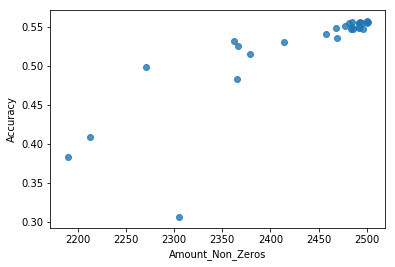

In [111]:
def P6():
    # Keep this random seed here to make comparison easier.
    np.random.seed(0)

    ### STUDENT START ###
    
    ###L1 Regularization Algorithm###
    count_vect= CountVectorizer()
    YYY = count_vect.fit_transform(train_data)
    YYZ = count_vect.transform(dev_data)
    
    LG = LogisticRegression(penalty='l1',multi_class='ovr',C = 0.2, tol = 0.01, solver='saga')
    YYTT = LG.fit(YYY, train_labels)

    YYZZ = YYTT.coef_
    T=0
    for iii in range(YYZZ.shape[1]):
        if sum(YYZZ[:,(iii-1)])==0:
            T= T+1
    print("The number of non-zero features in the L1 regularization model with tolerance = 0.01 are")    
    print((YYZZ.shape[1] -T))
    
    T1=[]
    for iv in range(YYZZ.shape[1]):
        if sum(YYZZ[:,(iv-1)])!= 0:
            T1.append(iv)
    
    YES = YYY[:,T1]
    YES3 = YYZ[:,T1]
    ### L2 Regularization Algorithm ###
    
    LG2 = LogisticRegression(penalty='l2',multi_class='multinomial',C = 0.2, solver='lbfgs')
    YYTT2 = LG2.fit(YYY, train_labels)

    YYZZ2 = YYTT2.coef_
    T2 = 0
    for iii in range(YYZZ2.shape[1]):
        if sum(YYZZ2[:,(iii-1)])==0:
            T2= T2+1
        
    print("The number of non-zero features in the L2 regularization model are")  
    print((YYZZ2.shape[1]-T2))
    
    
    ### Using the values from the L1 non-zero regularization ### 
    Non_Zero = []
    Accuracy = []
    Regular_Strength = [0.00001,0.0001,0.001,0.01,0.02,0.03,0.04,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0]
    for xx in Regular_Strength:
        LG3 = LogisticRegression(penalty='l2',multi_class='multinomial',C = xx, solver='lbfgs')
        YES2 = LG3.fit(YES, train_labels)

        YYZZ = YES2.coef_
        T=0
        for iii in range(YYZZ.shape[1]):
            if sum(YYZZ[:,(iii-1)])==0:
                T= T+1
                
        TRUST= YYZZ.shape[1] -T
        Non_Zero.append(TRUST)

        
        predict = LG3.predict(YES3)
        correct, total = 0, 0
        for pred, label in zip(predict, dev_labels):
            if pred == label: 
                correct += 1
            total += 1
        
        Accuracy.append(correct/total)

            
    # Making a dataframe table that can be used for plotting the accuracy data vs the pruning from C-regularization #
    True3= np.vstack((Non_Zero,Accuracy))
    True3= True3.transpose()
    Column_Names1= ['Amount_Non_Zeros', 'Accuracy']
    True4 = pd.DataFrame(True3,columns= Column_Names1)
    print(True4)
    
    #Making a scatter plot of the Amount_Non_Zeros vs Accuracy#
    sns.regplot(x=True4["Amount_Non_Zeros"], y=True4["Accuracy"], fit_reg=False)

    ### STUDENT END ###
P6()

(7) Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

[4 pts]

In [156]:
def P7():
    ### STUDENT START ###
    tfid_vect= TfidfVectorizer()
    YYY = tfid_vect.fit_transform(train_data)
    YYZ = tfid_vect.transform(dev_data)
    
    LG = LogisticRegression(penalty='l2',multi_class='multinomial',C = 100, solver='lbfgs')
    YY = LG.fit(YYY, train_labels)
    
    ERR= YY.predict_proba(YYZ)
    ERR2= ERR.tolist()
    
    predict = LG.predict(YYZ)
    correct, total = 0, 0
    for pred, label in zip(predict, dev_labels):
        if pred == label: 
            correct += 1
        total += 1
    print("Accuracy of TFIDF_Vectorizer is", correct/total)
    
    
    ###This section is to print out the Dev_Labels###
    ii=0
    RealValueDev = []
    PredictedValueDev = []
    R_Value = []
    for i in ERR2:
        y = max(i)
        yy = i.index(y)
        Valueyy = categories[yy]
        Dev= dev_labels[ii]
        ValueDev =  categories[Dev]
        R= y/i[Dev]
        ii= ii+1
    
    ###Appending all the values to a List for eventual computation and mistake visualization###
        RealValueDev.append(ValueDev)
        PredictedValueDev.append(Valueyy)
        R_Value.append(int(R))

    ###Making a dataframe- Easier to work with###
    True3= np.vstack((RealValueDev, PredictedValueDev, (R_Value)))
    True3= True3.transpose()
    Column_Names1= ['True-Values', 'Predicted-Values', 'R_Value']
    True4 = pd.DataFrame(True3,columns= Column_Names1)
    return(True4.sort_values('R_Value', ascending = False))
    
    
    ### STUDENT END ###
P7()

Accuracy of TFIDF_Vectorizer is 0.7588757396449705


,True-Values,Predicted-Values,R_Value
655,talk.religion.misc,alt.atheism,95
184,sci.space,alt.atheism,9
16,alt.atheism,talk.religion.misc,9
512,alt.atheism,talk.religion.misc,9
561,alt.atheism,talk.religion.misc,9
181,alt.atheism,talk.religion.misc,84
389,sci.space,talk.religion.misc,8
560,alt.atheism,sci.space,8
89,alt.atheism,talk.religion.misc,8
368,talk.religion.misc,comp.graphics,8


ANSWER 1: The Test Frequency- Inverse document frequency (TF-IDF) takes the inverse of the frequency count of each feature thus features that occur rarely are given more weights than feature that occur more frequently. This is different than the countVectorizer that by default outputs all the features without any weightage on the frequency of coccurence etc.


ANSWER 2: The model is making wrong predictions on the alt.atheism and the talk.religion.misc topics ...... These two topic sets appear to be very similar in scope and thus not surprising that the algorithm is assuming for the most part (and with high degree of confidence that one is another.

A simple approach would be to combine both into a class called 'Religion.' Although we do loose granularity in this case.



(8) EXTRA CREDIT

Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.

- [1 pt] for a reasonable attempt
- [2 pts] for improved performance

In [184]:
def better_preprocessor2(s):
### STUDENT START ###

        ###Creating a word tokenizer that accepts a group of words###
    
    #This can be considered my tokenizer function#
    words3= []
    words2= s    
    #The digits are selected and replaced with 999#
    b = re.compile(r'^\d+$')
    c = re.compile(r'^\w+$')
    #Any words with "_" is removed completely#
    d = re.compile(r'^\_+$')
    #Any words with "*" is removed completely#
    e = re.compile(r'^\*+$')
    #Any words containing "-" is removed completely#
    f = re.compile(r'^\-+$')
    #Any words containing "?" is removed completely#
    g = re.compile(r'^\?+$') 
    #Any words containing "@" is removed completely#
    h = re.compile(r'^\@+$')
    if b.search(str(words2)) != None:
        words3.append('1')
    elif c.search(str(words2)) != None:
        if d.search(str(words2)) != None:
            words3.append('')
        elif e.search(str(words2)) != None:
            words3.append('')
        elif f.search(str(words2)) != None:
            words3.append('')
        elif g.search(str(words2)) != None:
            words3.append('')
        elif h.search(str(words2)) != None:
            words3.append('')
        else:
            en_stop = get_stop_words('en')
            if words2.lower() in en_stop:
                words3.append('')
            else:
                p_stemmer = PorterStemmer()
                words3.append(p_stemmer.stem(words2.lower()))
    return ' '.join(words3)


better_preprocessor2("TaiwoAlabi")

'taiwoalabi'

In [190]:
def better_preprocessor2(s):
### STUDENT START ###

    
    words1= s.split(' ')
    words3= []
    for words2 in words1:
    #This can be considered my tokenizer function#  
    #The digits are selected and replaced with 999#
        b = re.compile(r'^\d+$')
        c = re.compile(r'^\w+$')
        #Any words with "_" is removed completely#
        d = re.compile(r'^\_+$')
        #Any words with "*" is removed completely#
        e = re.compile(r'^\*+$')
        #Any words containing "-" is removed completely#
        f = re.compile(r'^\-+$')
        #Any words containing "?" is removed completely#
        g = re.compile(r'^\?+$') 
        #Any words containing "@" is removed completely#
        h = re.compile(r'^\@+$')
        if b.search(str(words2)) != None:
            words3.append('1')
        elif c.search(str(words2)) != None:
            #if d.search(str(words2)) != None:
                #words3.append('')
            #elif e.search(str(words2)) != None:
                #words3.append('')
            #elif f.search(str(words2)) != None:
                #words3.append('')
            #elif g.search(str(words2)) != None:
                #words3.append('')
            #elif h.search(str(words2)) != None:
                #words3.append('')
            #else:
            en_stop = get_stop_words('en')
            if words2.lower() in en_stop:
                words3.append('')
            else:
                p_stemmer = PorterStemmer()
                words3.append(p_stemmer.stem(words2.lower()))
        return ' '.join(words3)



def P7():
    ### STUDENT START ###
    tfid_vect= TfidfVectorizer(preprocessor =better_preprocessor2)
    YYY = tfid_vect.fit_transform(train_data)
    YYZ = tfid_vect.transform(dev_data)
    
    LG = LogisticRegression(penalty='l2',multi_class='multinomial',C = 100, solver='lbfgs')
    YY = LG.fit(YYY, train_labels)
    
    ERR= YY.predict_proba(YYZ)
    ERR2= ERR.tolist()
    
    predict = LG.predict(YYZ)
    correct, total = 0, 0
    for pred, label in zip(predict, dev_labels):
        if pred == label: 
            correct += 1
        total += 1
    print("Accuracy of TFIDF_Vectorizer is", correct/total)
    
    
    ###This section is to print out the Dev_Labels###
    ii=0
    RealValueDev = []
    PredictedValueDev = []
    R_Value = []
    for i in ERR2:
        y = max(i)
        yy = i.index(y)
        Valueyy = categories[yy]
        Dev= dev_labels[ii]
        ValueDev =  categories[Dev]
        R= y/i[Dev]
        ii= ii+1
    
    ###Appending all the values to a List for eventual computation and mistake visualization###
        RealValueDev.append(ValueDev)
        PredictedValueDev.append(Valueyy)
        R_Value.append(int(R))

    ###Making a dataframe- Easier to work with###
    True3= np.vstack((RealValueDev, PredictedValueDev, (R_Value)))
    True3= True3.transpose()
    Column_Names1= ['True-Values', 'Predicted-Values', 'R_Value']
    True4 = pd.DataFrame(True3,columns= Column_Names1)
    return(True4.sort_values('R_Value', ascending = False))
    
    
    ### STUDENT END ###
P7()

Accuracy of TFIDF_Vectorizer is 0.3121301775147929


,True-Values,Predicted-Values,R_Value
62,alt.atheism,sci.space,96
60,alt.atheism,talk.religion.misc,92
272,sci.space,alt.atheism,91
629,sci.space,comp.graphics,4
565,alt.atheism,comp.graphics,283
447,talk.religion.misc,sci.space,211
665,talk.religion.misc,sci.space,211
357,talk.religion.misc,comp.graphics,2
277,talk.religion.misc,sci.space,110
450,sci.space,sci.space,1
